In [2]:
# pandas for handling our data
import pandas as pd
# matplotlib and seaborn for visualize our data
import matplotlib.pyplot as plt

# ==="Seaborn overwrite Matplotlib to produce vastly superior output.We can set the style by calling Seaborn's set() method"
import seaborn as sns
# numpy for numeric operations
import numpy as np
# tensorflow! our machine learning library
import tensorflow as tf
# train_test_split from sklearn for splitting our data into train and test set
from sklearn.model_selection import train_test_split
# OneHotEncoder from sklearn for converting features and labels to one-hot encoding
from sklearn.preprocessing import OneHotEncoder
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend.
# ===="any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:"
%matplotlib inline

In [3]:
# load the data
df = pd.read_csv('Iris.csv')
# print some of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# how many data in each species
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
# ====="It will give the details of the columns"
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


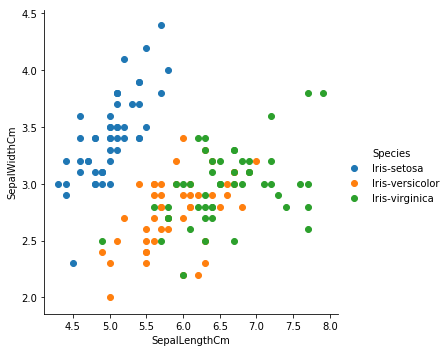

In [6]:
# let's visualize the data with sepalLength and sepalWidth 
sns.FacetGrid(df, hue='Species', size=5).map(plt.scatter, 
            'SepalLengthCm', 'SepalWidthCm').add_legend()

In [7]:
# let's drop Id column because we don't need it
df = df.drop('Id', axis=1)
# convert Species name to numerical value
# Iris setosa = 1
# Iris versicolor = 2
# Irsi virginica = 3
df['Species'] = df['Species'].replace(['Iris-setosa',
                'Iris-versicolor','Iris-virginica'], [1,2,3])
# now let's print some of the data
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
# X is our features ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 
              'PetalWidthCm']]
# y is our labels
y = df.loc[:, ['Species']]

In [9]:
# declare OneHotEncoder from sklearn
# ==="X,y is one-hot encoded, so it has one 1 and all other are zero."
oneHot = OneHotEncoder()
# fit our X to oneHot encoder 
oneHot.fit(X)
# transform
X = oneHot.transform(X).toarray() 
# fit our y to oneHot encoder
oneHot.fit(y)
# transform
y = oneHot.transform(y).toarray()

print("Our features X in one-hot format")
print(X)

#print("Our features y in one-hot format")
#print(y)

Our features X in one-hot format
[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "ca

In [10]:
# let's split our data into training and testing set
# ====="random_state = 0 gives resulting in same result when we run multiple time" 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1
                                                   , random_state=0)
# let's print shape of each train and testing
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (135, 15)
Shape of y_train:  (135, 3)
Shape of X_test:  (15, 15)
Shape of y_test:  (15, 3)


In [11]:
# hyperparameters
learning_rate = 0.0001
num_epochs = 1500
display_step = 1
# for visualize purpose in tensorboard we use tf.name_scope
with tf.name_scope("Declaring_placeholder"):
    # X is placeholdre for iris features. We will feed data later on
    # ======"None indicates that the first dimension, corresponding to the batch size, can be of any size. "
    X = tf.placeholder(tf.float32, [None, 15])
    # y is placeholder for iris labels. We will feed data later on
    y = tf.placeholder(tf.float32, [None, 3])
    #print(y)
with tf.name_scope("Declaring_variables"):
    # W is our weights. This will update during training time
    W = tf.Variable(tf.zeros([15,3]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([3]))
    
with tf.name_scope("Declaring_functions"):
    # our prediction function
    y_ = tf.nn.softmax(tf.add(tf.matmul(X,W),b))
    #print(y_)

Tensor("Declaring_placeholder/Placeholder_1:0", shape=(?, 3), dtype=float32)
Tensor("Declaring_functions/Softmax:0", shape=(?, 3), dtype=float32)


In [13]:
with tf.name_scope("calculating_cost"):
    # calculating cost
    cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
    #print(cost)
with tf.name_scope("declaring_gradient_descent"):
    # optimizer
    # we use gradient descent for our optimizer 
    #==="GD optimization minimize cost funtion to maximize the performance of the model"
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    #print(optimizer)

In [44]:
with tf.name_scope("starting_tensorflow_session"):
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in range(num_epochs):
            cost_in_each_epoch = 0
            # let's start training
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, y: y_train})
            cost_in_each_epoch += c
            # you can uncomment next two lines of code for printing cost when training
            #if(epoch+1) % display_step == 0:
                #print("Epoch: {}".format(epoch + 1),"cost={}".format(cost_in_each_epoch))
        
        print("Optimization Finished!")
        # Test model    
        ''' ===" 
        tf.argmax
        Returns the index with the largest value across axes of a tensor.

        tf.equal
        Returns the truth value of (x == y) element-wise.

        tf.cast
        Casts a tensor to a new type.

        tf.reduce_mean
        Computes the mean of elements across dimensions of a tensor."
        '''       
        
        correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y,1))
        # Calculate accuracy for 3000 examples
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            
        print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
            
            

Optimization Finished!
Accuracy: 1.0
